In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import matplotlib.pyplot as plt

In [14]:
excludes = ['Boskednan,']

df = pd.read_csv(
    "data_clean.csv",
    index_col=0,
    )
df = df.fillna(0)
df = df.replace(['y', 'Y', '?'], [1, 1, 0])
df = df.astype(int)
# df = df.sort_index()
df.index = df.index.str.strip()
df = df[~df.index.isin(excludes)]
df

,standing stones/bouldrers,orthostats/boulders and bank,ditch and bank,bank,stones on or protrude from mound,"other, inc once below mound",regularly spaced,irregularly spaced,contiguoius,bank faced inside,...,arc outside,paired stones outside,avenue row,other.2,part of complex,other.3,diam 1,diam 2,diam 3,diam 4
"Upper Auchnagorth, Aber",1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"Abercross, High",1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"Achanarass Hill, Highlands",1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"Acharn Falls , P&K",1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"Airich, P&K",0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"White Moss NE, C",1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
"White Moss NW, C",1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
Winterbourne Bassett,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
"Woodside, P&K",1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
def plot_dendrogram_from_df(df, method):
    X = df.values
    Z = linkage(X, method=method)

    c, coph_dists = cophenet(Z, pdist(X))
    c

    plt.figure(figsize=(10, 25))
    plt.title(f'Hierarchical Clustering, {method} method\ncophenet: {c:.2f}')
    plt.xlabel('Distance')
    plt.ylabel('Site')
    dendrogram(
        Z,
        orientation='right',
        # leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels,
        labels=df.index,
    )
    plt.savefig(f"clustering - {method}.png")

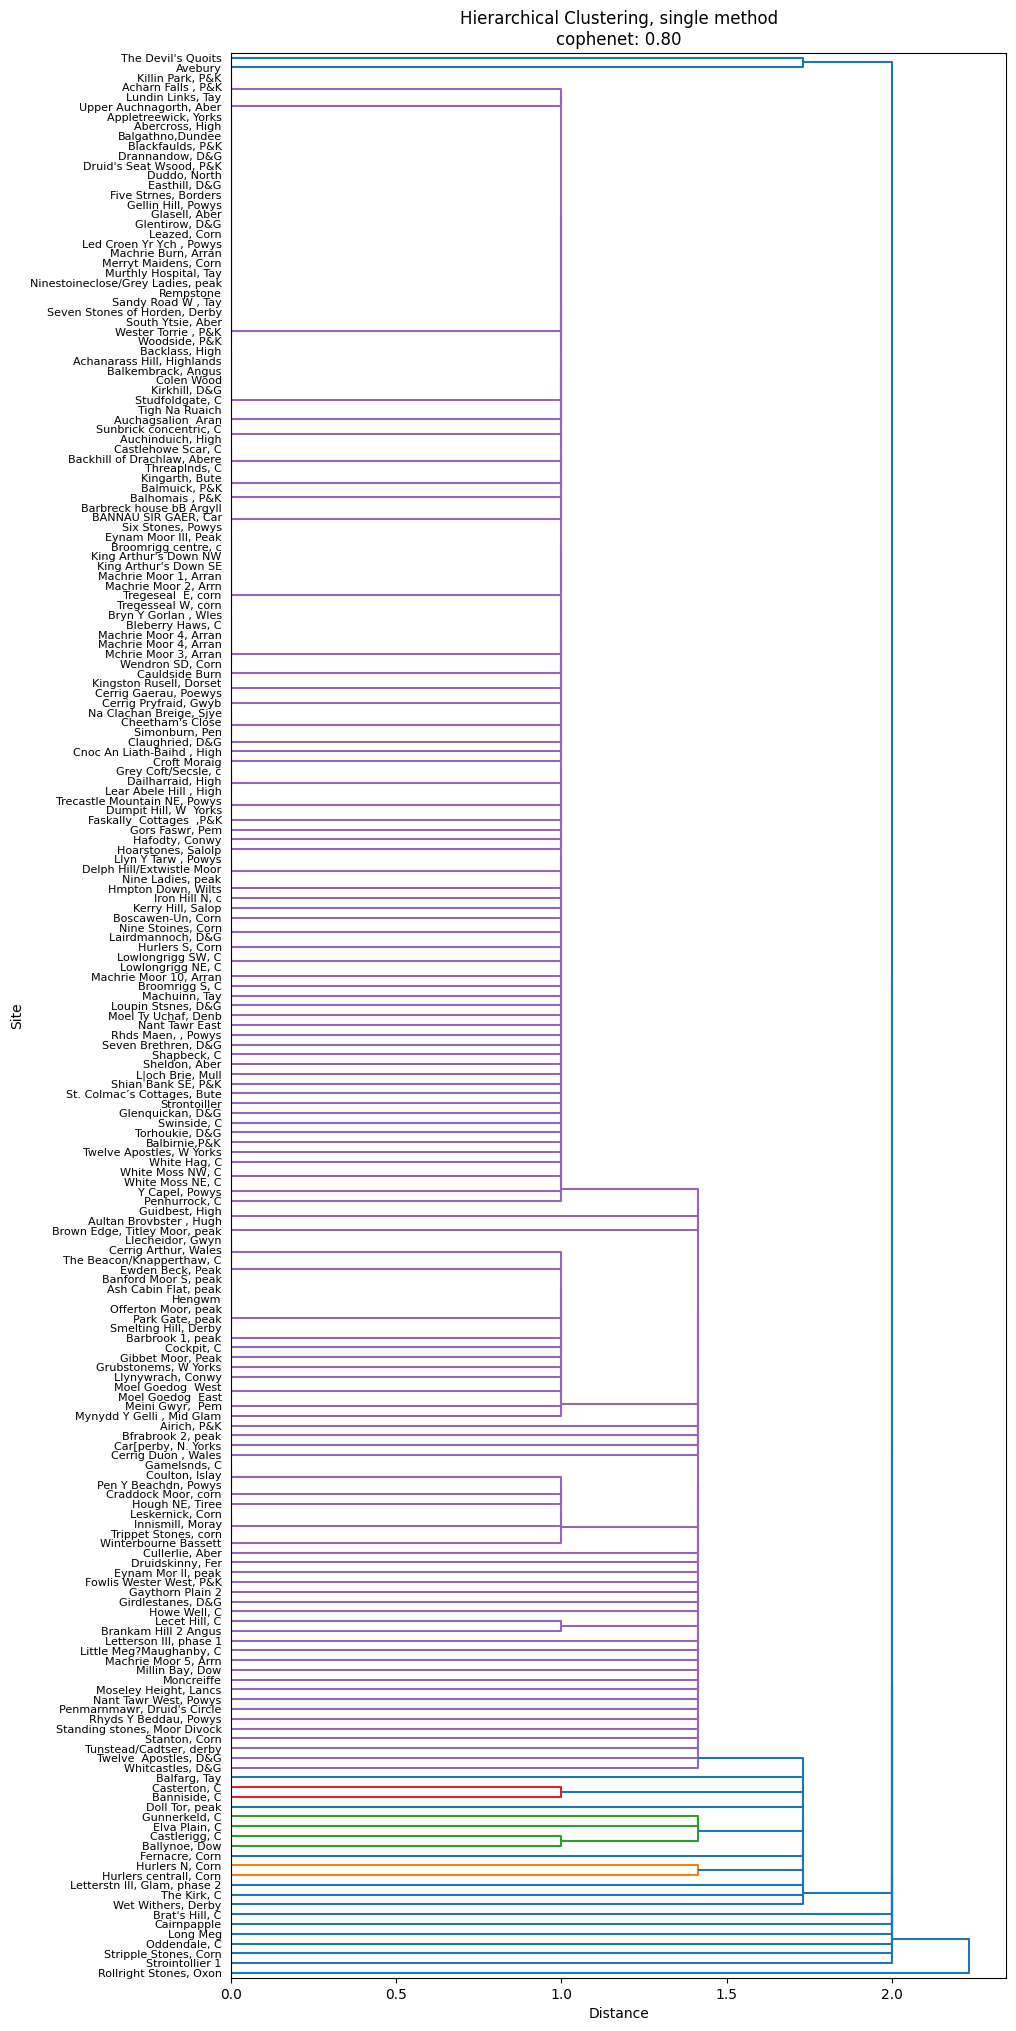

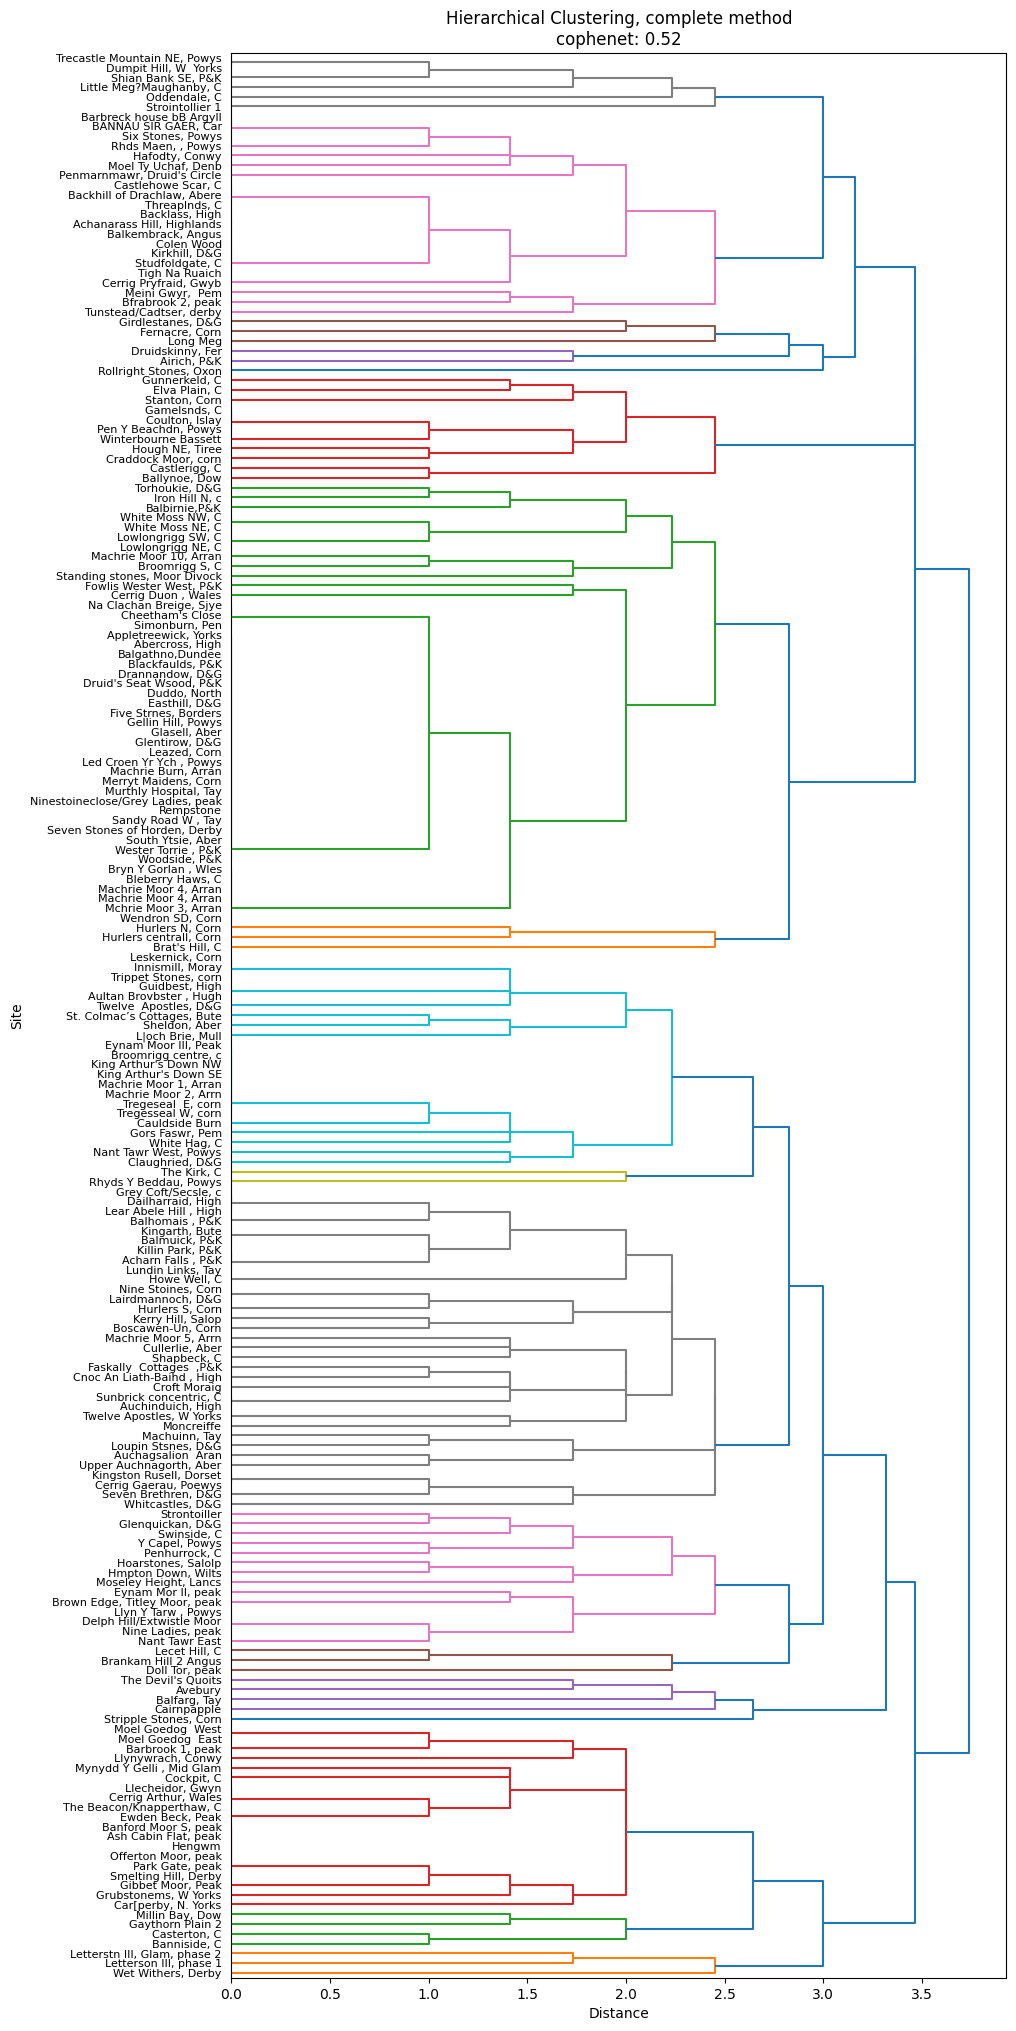

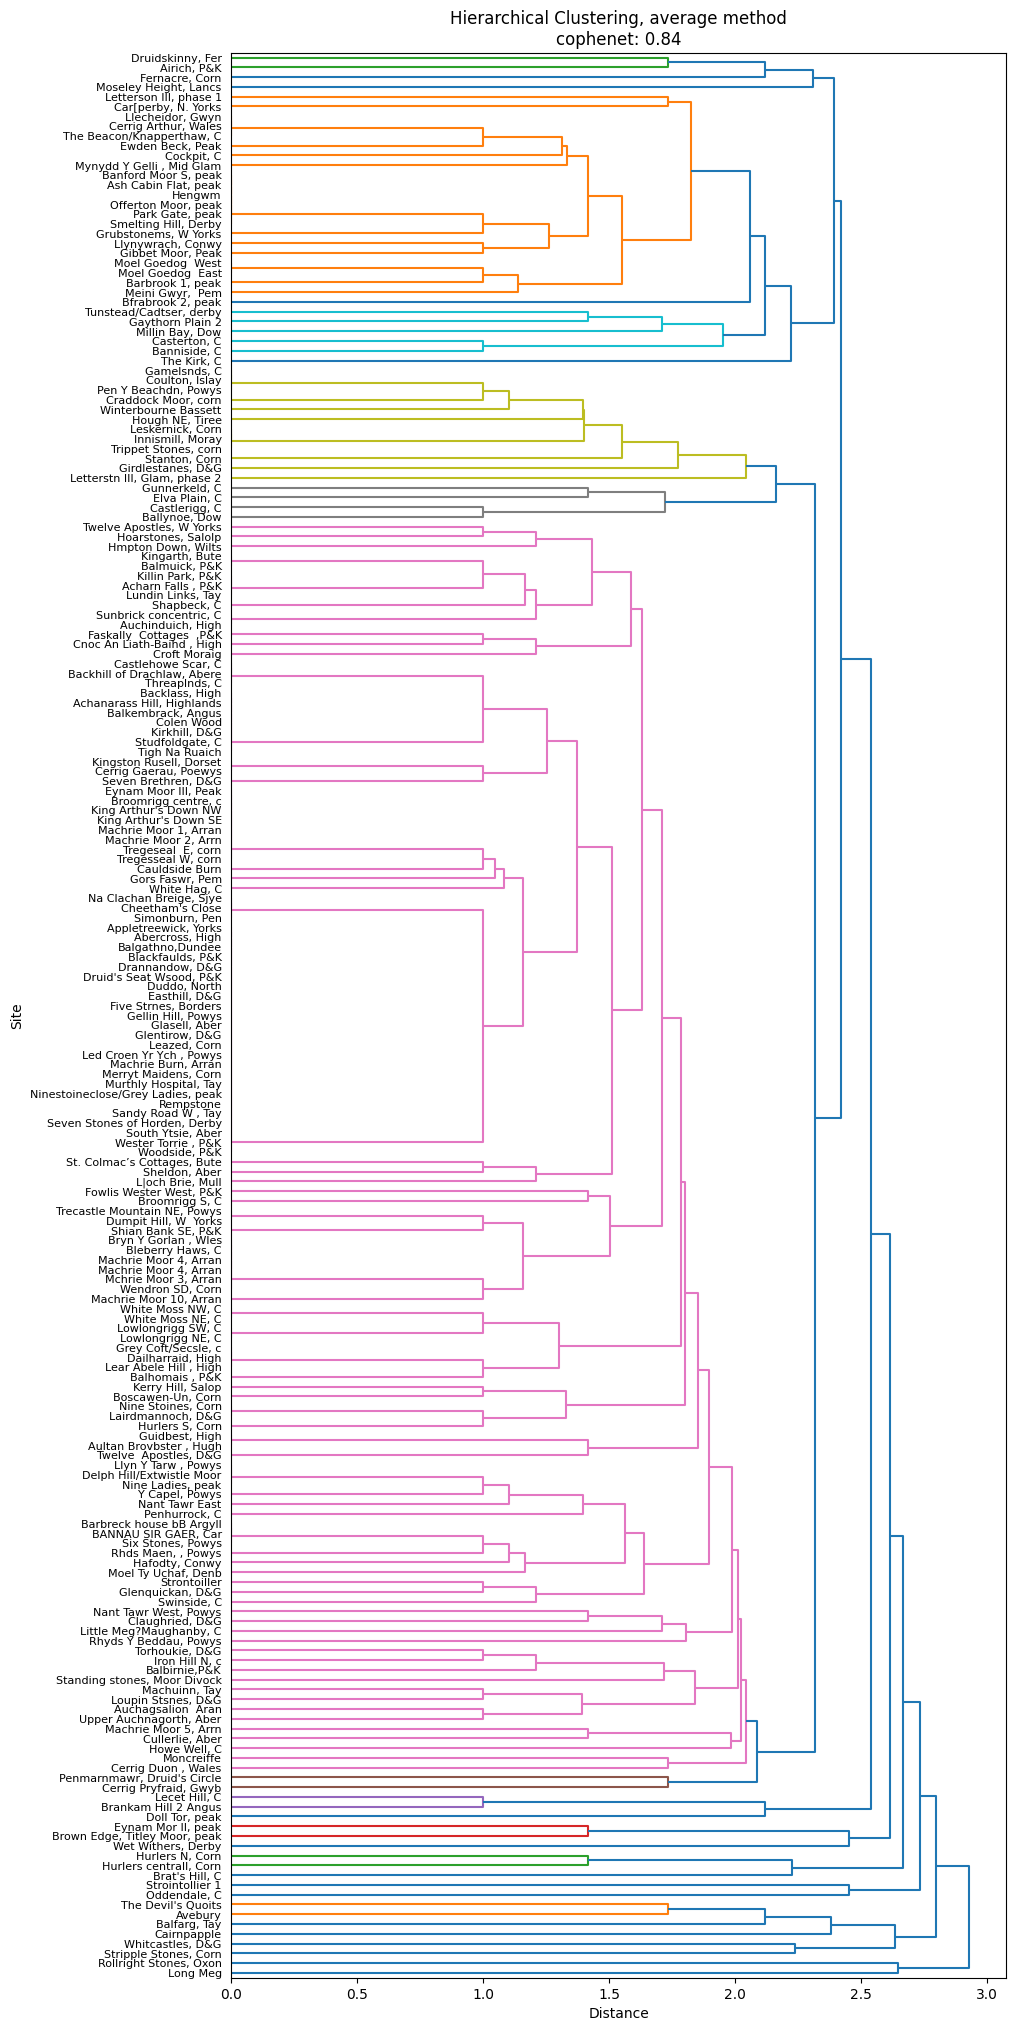

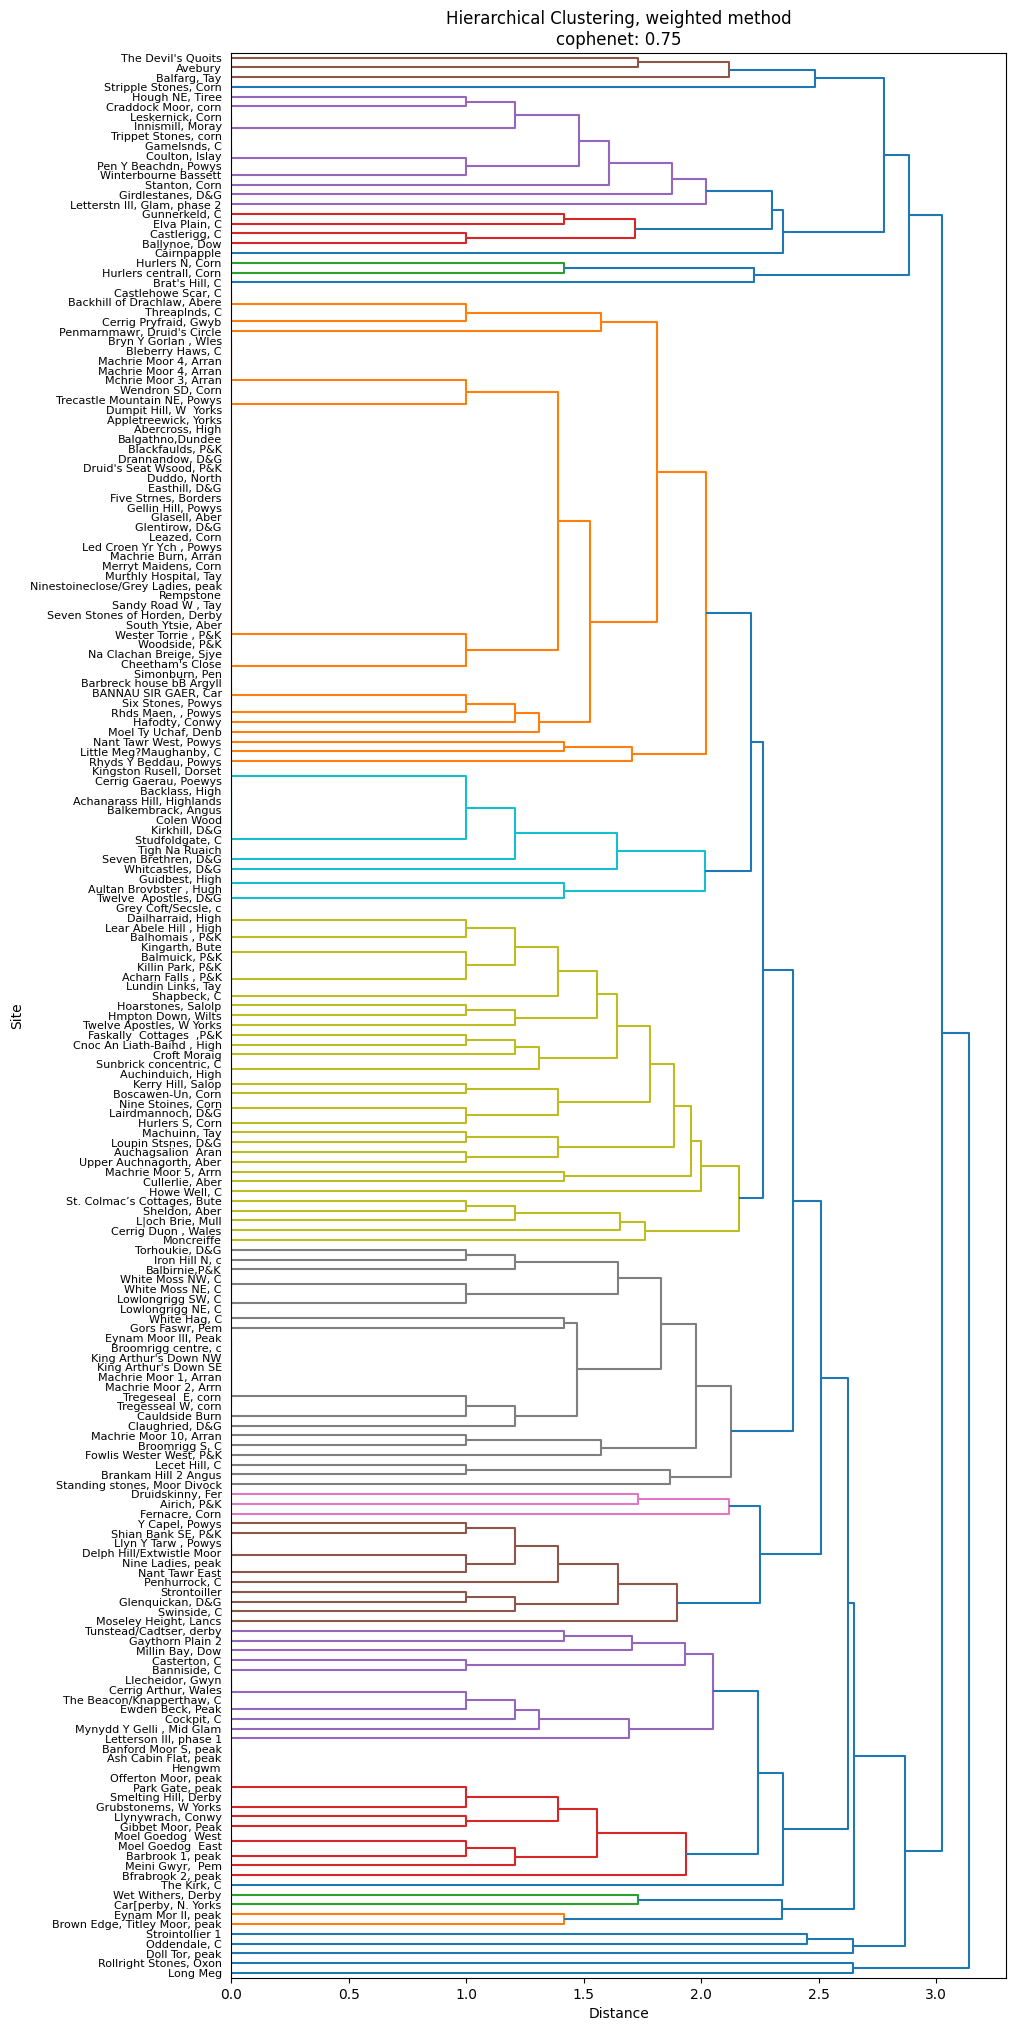

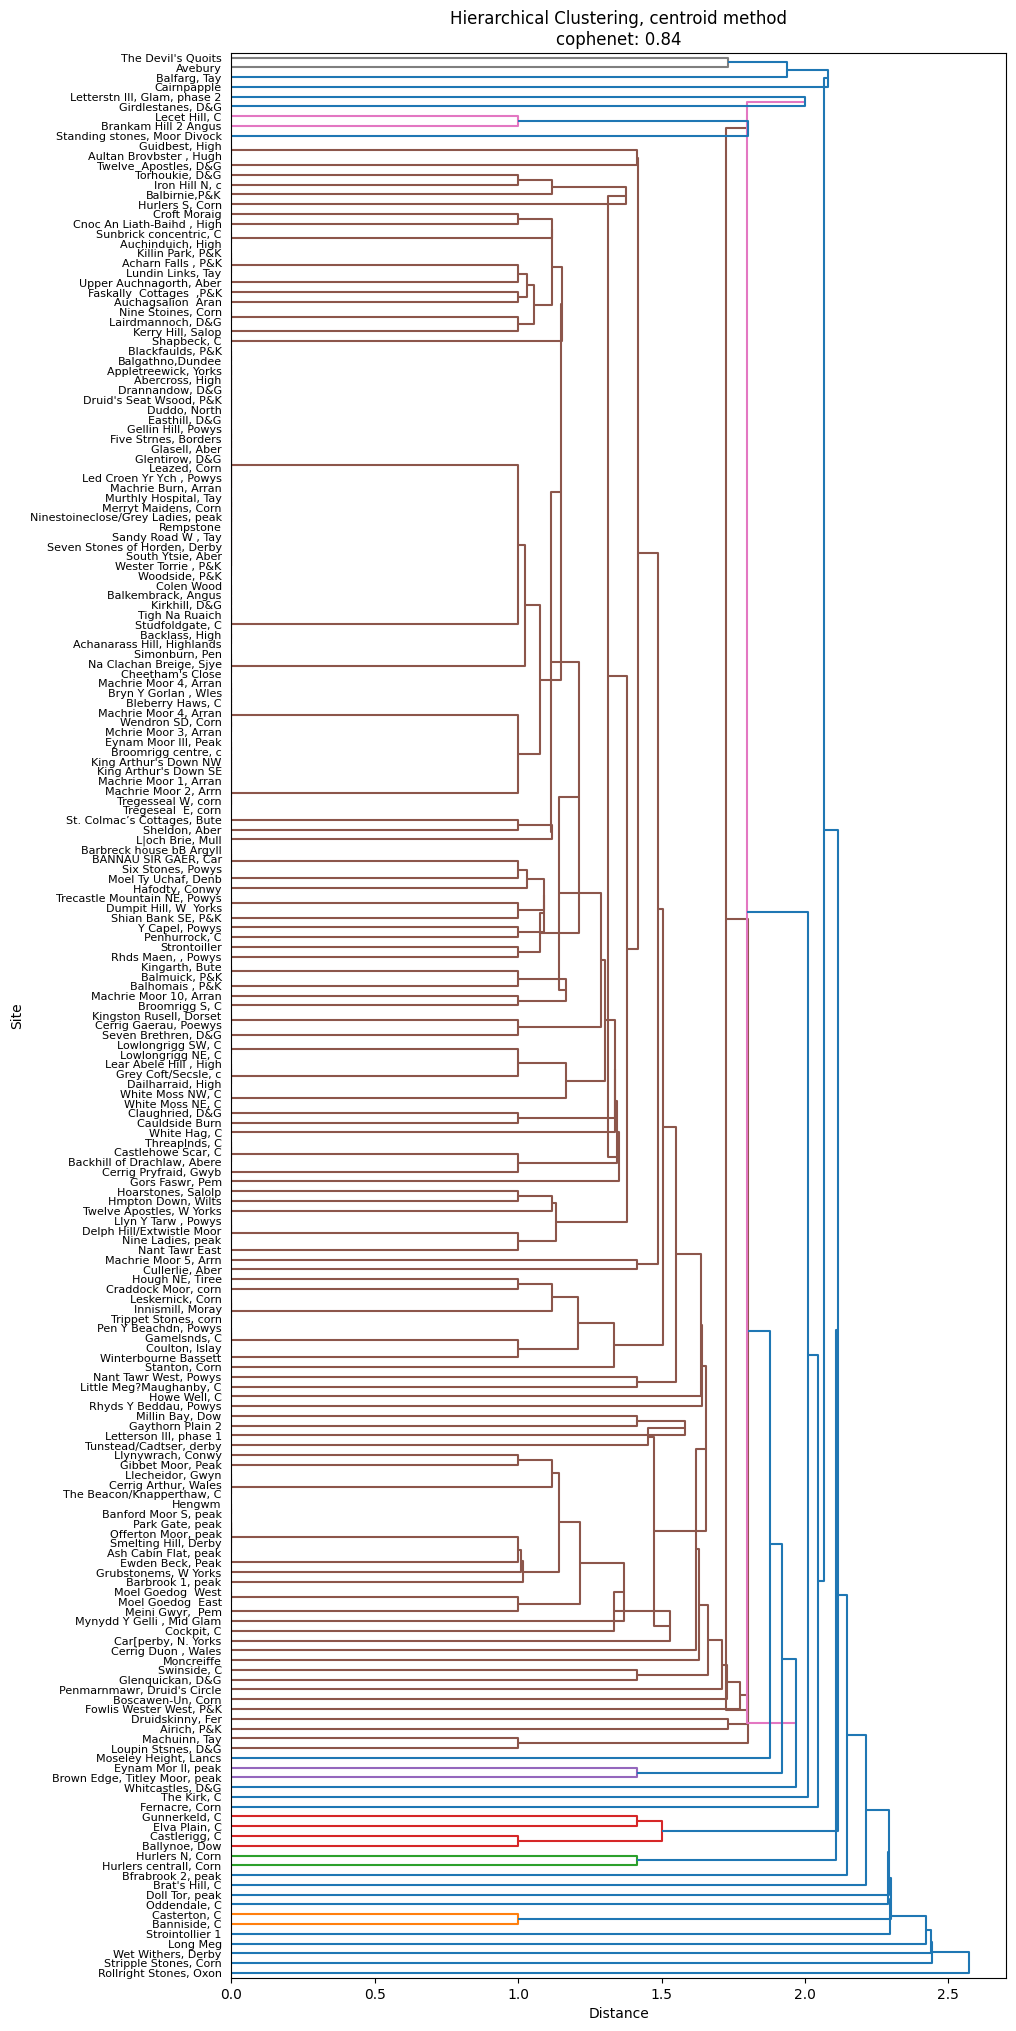

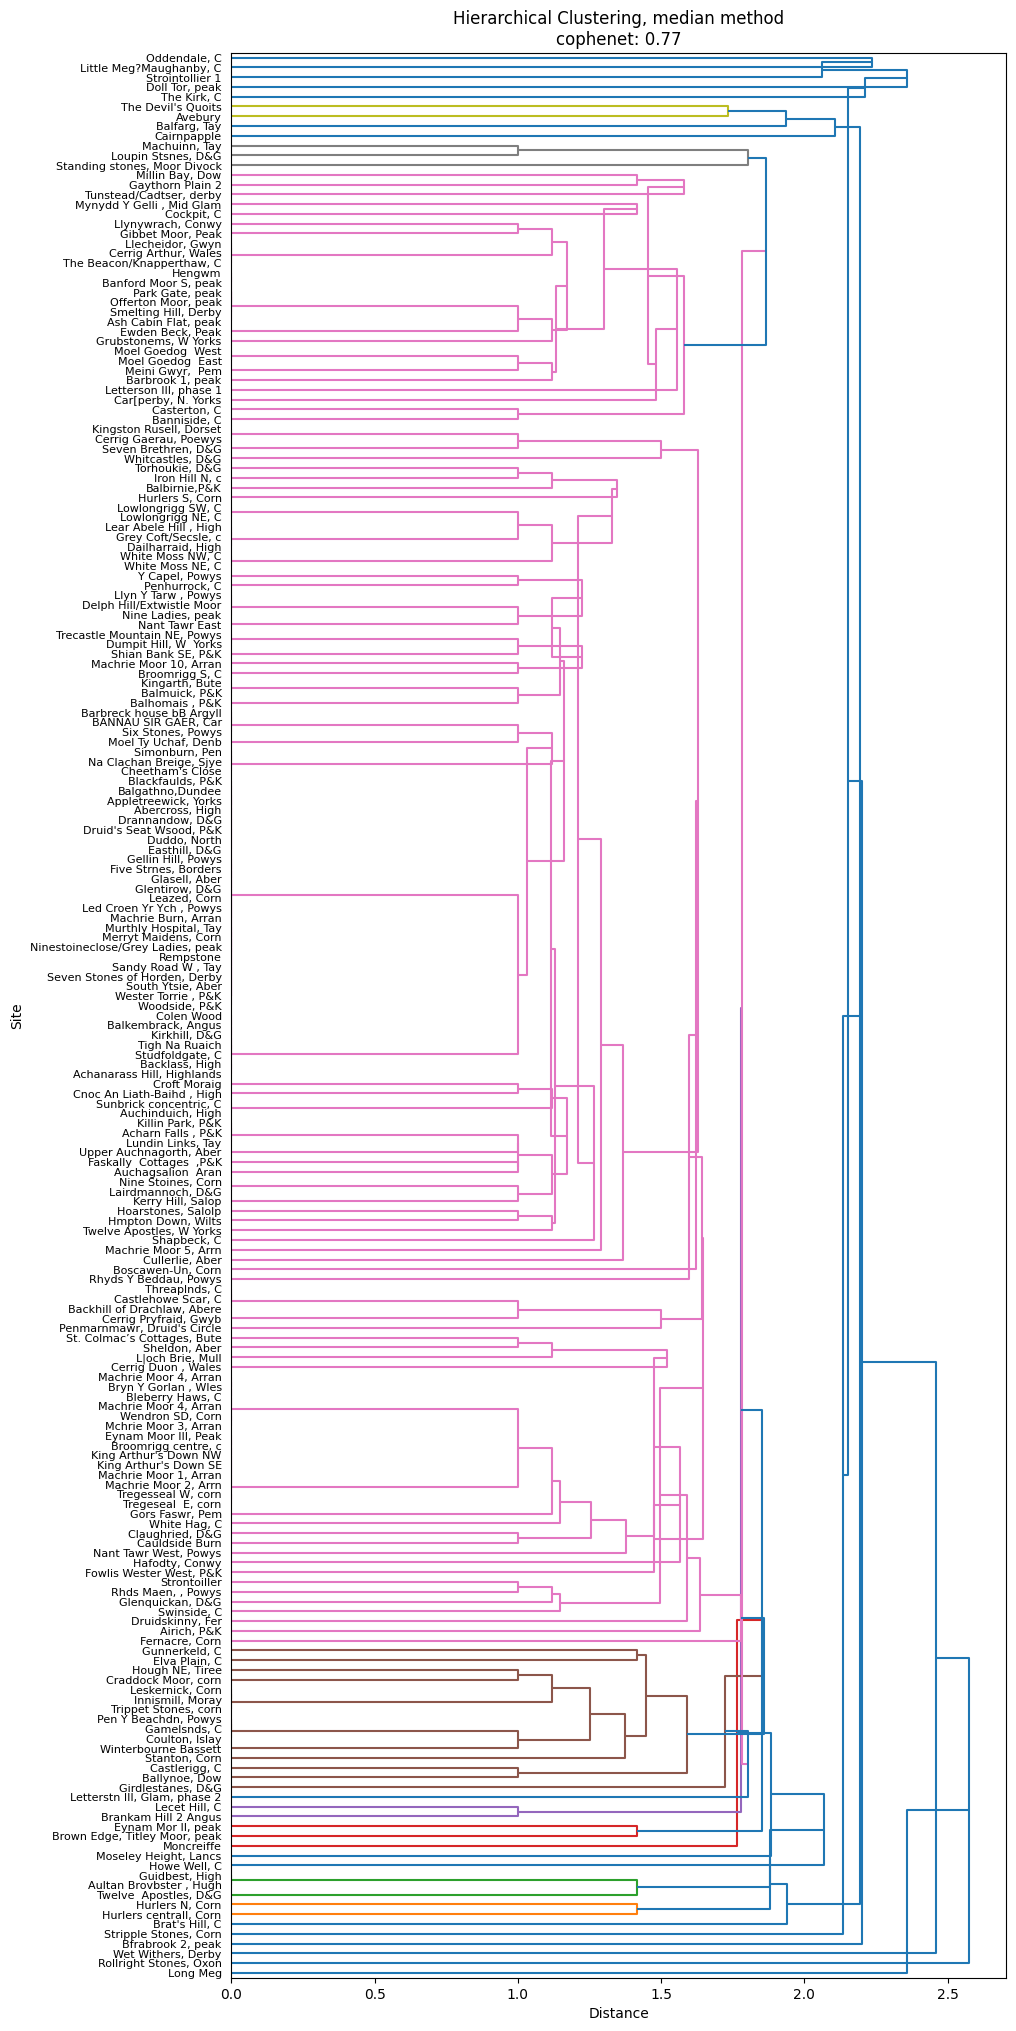

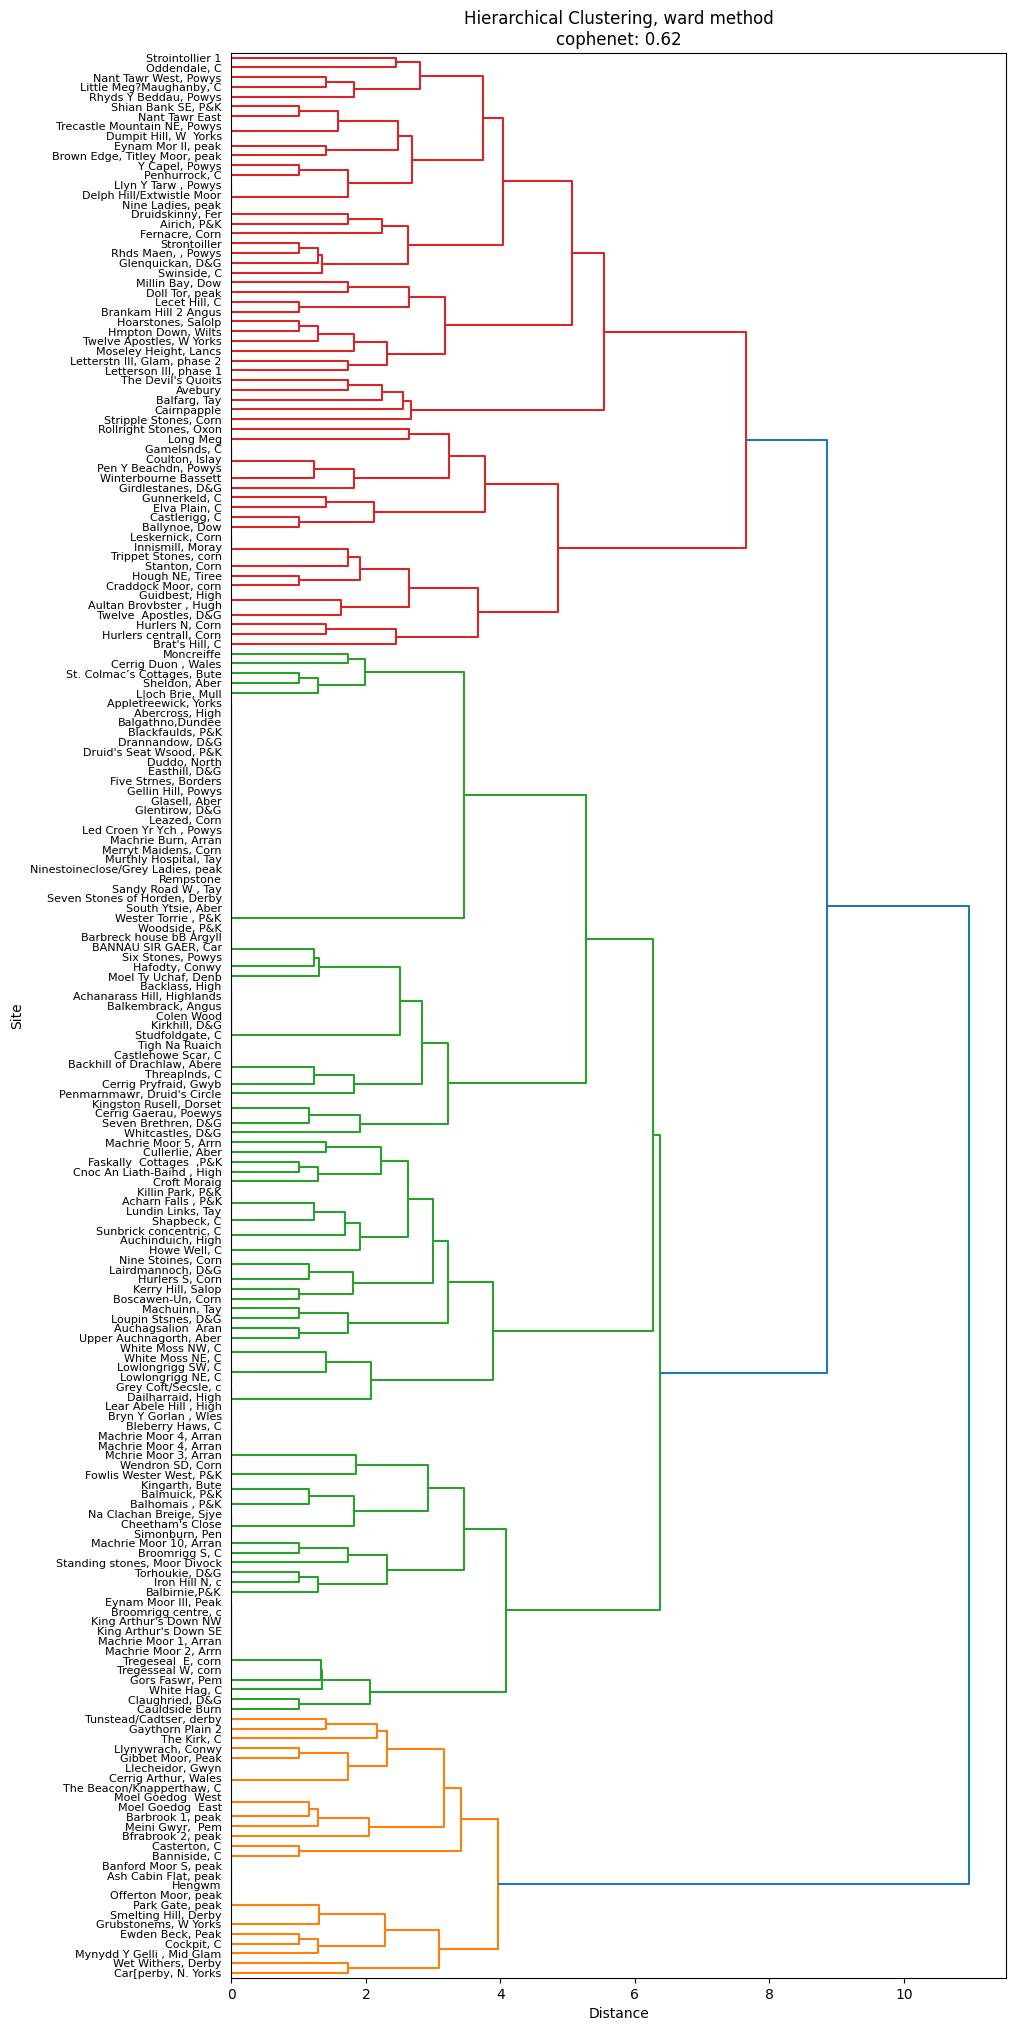

In [29]:
methods = [
    'single',
    'complete',
    'average',
    'weighted',
    'centroid',
    'median',
    'ward'
    ]
    
for method in methods:
    plot_dendrogram_from_df(df, method)